In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nv = pd.read_csv('E:/May 30 DecisionTree/titanic_data.csv')

In [3]:
nv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
nv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
nv.shape

(891, 12)

In [6]:
nv['Age'].isnull().sum()

177

In [7]:
nv['Age'].fillna(0, inplace=True)
#nv['Age'] = nv['Age'].fillna(np.mean(nv['Age']))

In [8]:
nv['Sex']=nv.Sex.replace({'male':0, 'female':1})

In [9]:
#nv['Name'] = nv.Name.drop('Name', axis = 1, inplace = True)
#nv.drop('Name'] axis=1, inplace=True)
nv.drop(['Name'], axis=1, inplace=True)

In [10]:
nv.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C


In [11]:
nv['Embarked'].fillna(0, inplace=True)

In [12]:
nv['Embarked'].value_counts()

S    644
C    168
Q     77
0      2
Name: Embarked, dtype: int64

In [13]:
nv['Embarked']=nv.Embarked.replace({'S':1, 'C':2, 'Q':3 })
#nv['Embarked'] = nv['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

In [14]:
nv.drop(['Cabin'], axis=1, inplace=True)

In [15]:
nv.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
X = [['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']]
Y = [['Survived']]

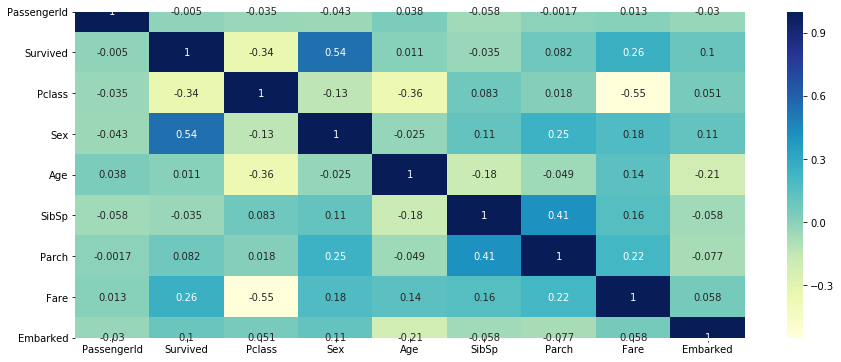

In [17]:
corrmat = nv.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,6))
sns.heatmap(nv.corr(),cmap = 'YlGnBu', annot=True)

###### correaltion: among Fare, Pclass, Pclass is less effecting to the target variable so, im droping 'Pclass'

In [18]:
nv.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.038125,-0.057527,-0.001652,0.012658,-0.030323
Survived,-0.005007,1.000000,-0.338481,0.543351,0.010539,-0.035322,0.081629,0.257307,0.101849
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.361353,0.083081,0.018443,-0.549500,0.050992
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.024978,0.114631,0.245489,0.182333,0.111249
Age,0.038125,0.010539,-0.361353,-0.024978,1.000000,-0.184664,-0.048786,0.135516,-0.213632
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.184664,1.000000,0.414838,0.159651,-0.058008
Parch,-0.001652,0.081629,0.018443,0.245489,-0.048786,0.414838,1.000000,0.216225,-0.076625
Fare,0.012658,0.257307,-0.549500,0.182333,0.135516,0.159651,0.216225,1.000000,0.058462
Embarked,-0.030323,0.101849,0.050992,0.111249,-0.213632,-0.058008,-0.076625,0.058462,1.000000


In [19]:
nv.drop(['Pclass'], axis=1, inplace=True)

In [20]:
nv.isnull().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
X = nv[['Age', 'Embarked', 'Fare', 'Parch', 'Sex', 'SibSp']]
Y = nv[['Survived']]

In [22]:
X

,Age,Embarked,Fare,Parch,Sex,SibSp
0,22.0,1,7.2500,0,0,1
1,38.0,2,71.2833,0,1,1
2,26.0,1,7.9250,0,1,0
3,35.0,1,53.1000,0,1,1
4,35.0,1,8.0500,0,0,0
...,...,...,...,...,...,...
886,27.0,1,13.0000,0,0,0
887,19.0,1,30.0000,0,1,0
888,0.0,1,23.4500,2,1,1
889,26.0,2,30.0000,0,0,0


In [23]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


def convert_to_int(word):
    word_dict = {'0':Yes, '1':NO}
    return word_dict[word]

Y['Purchased'] = Y['Purchased'].apply(lambda Y: convert_to_int(Y))

nv['Purchased']=nv.Purchased.replace({'Yes':0, 'No':1})

nv.Purchased.replace(('yes', 'no'), (0, 1), inplace=True)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [26]:
from sklearn.naive_bayes import BernoulliNB

In [27]:
classifier = BernoulliNB()

In [28]:
classifier = classifier.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
Y_pred = classifier.predict(X_train)
X_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, X_pred)

In [31]:
cm

array([[88, 17],
       [22, 52]], dtype=int64)

In [32]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [33]:
print('The Training F1 Score is', f1_score(Y_pred, Y_train))
print('The Testing F1 Score is', f1_score(X_pred, Y_test))
print('Training Accuracy score', accuracy_score(Y_pred, Y_train))
print('Testing Accuracy score', accuracy_score(X_pred, Y_test))
#print('Recall score'), recall_score(Y_pred, Y_train)
#print('precision'), precision_score(X_pred, Y_test)

The Training F1 Score is 0.7056530214424951
The Testing F1 Score is 0.7272727272727273
Training Accuracy score 0.7879213483146067
Testing Accuracy score 0.7821229050279329


In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
classifier1 = GaussianNB()

In [36]:
classifier = classifier.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
y_pred = classifier.predict(X_train)
x_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, x_pred)

In [39]:
cm

array([[88, 17],
       [22, 52]], dtype=int64)

In [40]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [41]:
print('The Training F1 Score is', f1_score(y_pred, Y_train))
print('The Testing F1 Score is', f1_score(x_pred, Y_test))
print('Training Accuracy score', accuracy_score(y_pred, Y_train))
print('Testing Accuracy score', accuracy_score(x_pred, Y_test))
#print('Recall score'), recall_score(y_pred, Y_train)
#print('precision'), precision_score(x_pred, Y_test)

The Training F1 Score is 0.7056530214424951
The Testing F1 Score is 0.7272727272727273
Training Accuracy score 0.7879213483146067
Testing Accuracy score 0.7821229050279329
